# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('SINASC_RO_2019.csv')

df[['APGAR5', 'GESTACAO', 'SEXO', 'PESO']]

,APGAR5,GESTACAO,SEXO,PESO
0,10.0,37 a 41 semanas,Masculino,3685
1,9.0,37 a 41 semanas,Feminino,3055
2,10.0,37 a 41 semanas,Feminino,3460
3,10.0,37 a 41 semanas,Feminino,2982
4,10.0,37 a 41 semanas,Feminino,3310
...,...,...,...,...
27023,9.0,32 a 36 semanas,Masculino,2110
27024,9.0,37 a 41 semanas,Masculino,3310
27025,10.0,37 a 41 semanas,Masculino,3065
27026,9.0,32 a 36 semanas,Masculino,2352


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [32]:
df.loc[ ( df['APGAR5'] >= 8.0 ), 'asfixia'] = 'normal'
df.loc[ ( df['APGAR5'] >= 6.0 ) & ( df['APGAR5'] <= 7.0 ), 'asfixia'] = 'asfixia leve'
df.loc[ ( df['APGAR5'] >= 4.0 ) & ( df['APGAR5'] <= 5.0 ), 'asfixia'] = 'asfixia moderada'
df.loc[ ( df['APGAR5'] >= 0.0 ) & ( df['APGAR5'] <= 3.0 ), 'asfixia'] = 'asfixia severa'

df[['APGAR5', 'GESTACAO', 'SEXO', 'asfixia']]

,APGAR5,GESTACAO,SEXO,asfixia
0,10.0,37 a 41 semanas,Masculino,normal
1,9.0,37 a 41 semanas,Feminino,normal
2,10.0,37 a 41 semanas,Feminino,normal
3,10.0,37 a 41 semanas,Feminino,normal
4,10.0,37 a 41 semanas,Feminino,normal
...,...,...,...,...
27023,9.0,32 a 36 semanas,Masculino,normal
27024,9.0,37 a 41 semanas,Masculino,normal
27025,10.0,37 a 41 semanas,Masculino,normal
27026,9.0,32 a 36 semanas,Masculino,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

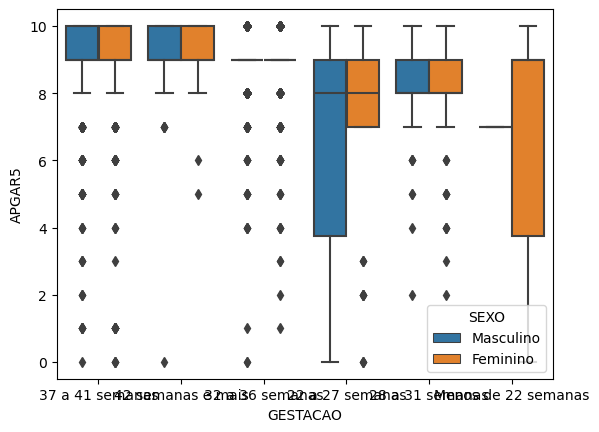

In [43]:
ax = sns.boxplot(data = df, y="APGAR5", x="GESTACAO", orient="v", hue='SEXO')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [44]:
freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [45]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  
GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41

<Axes: xlabel='GESTACAO'>

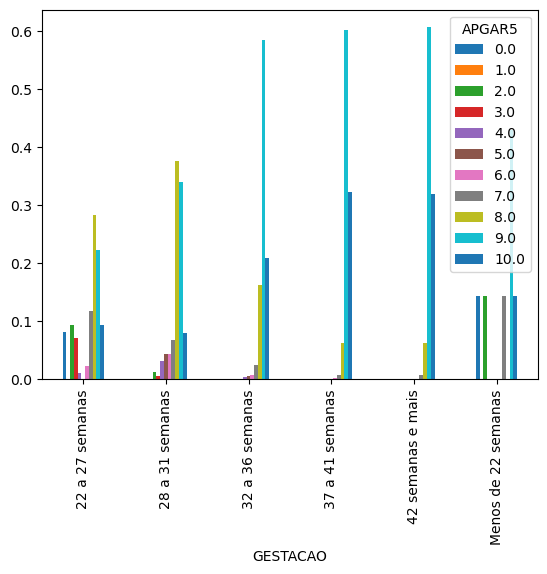

In [46]:
freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
print(freq)
print(freq.sum(1))

freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
print(freq_pctlin)

freq_pctlin.plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

C:\Users\danil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

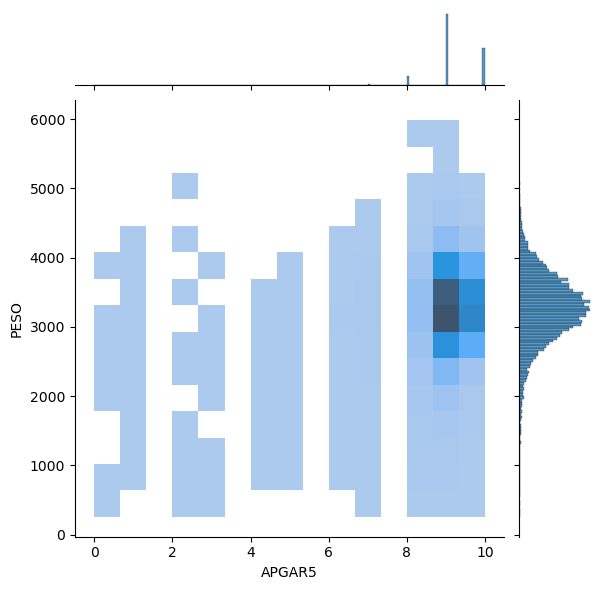

In [47]:
sns.jointplot(x = 'APGAR5'
              , y = 'PESO'
              , data = df
              , kind="hist"
              , bins = [15, 15])